In [1]:
words = open("../data/names.txt", "r").read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
max(len(w) for w in words)

15

In [6]:
b = {}
for w in words[:3]:
    ch = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(ch, ch[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
b

{('<S>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<E>'): 3,
 ('<S>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1,
 ('<S>', 'a'): 1,
 ('a', 'v'): 1,
 ('v', 'a'): 1}

In [7]:
import torch

In [8]:
N = torch.zeros((28,28), dtype=torch.int32)
N

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [9]:
# Build a lookup table from characters to number
chars = sorted(list(set(''.join(words))))
stoi = {s: i for i, s in enumerate(chars)}
stoi['<S>'] = 26
stoi['<E>'] = 27
stoi

{'a': 0,
 'b': 1,
 'c': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'g': 6,
 'h': 7,
 'i': 8,
 'j': 9,
 'k': 10,
 'l': 11,
 'm': 12,
 'n': 13,
 'o': 14,
 'p': 15,
 'q': 16,
 'r': 17,
 's': 18,
 't': 19,
 'u': 20,
 'v': 21,
 'w': 22,
 'x': 23,
 'y': 24,
 'z': 25,
 '<S>': 26,
 '<E>': 27}

In [10]:
for w in words:
    ch = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(ch, ch[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

In [11]:
itos = {i: s for s, i in stoi.items()}
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<S>',
 27: '<E>'}

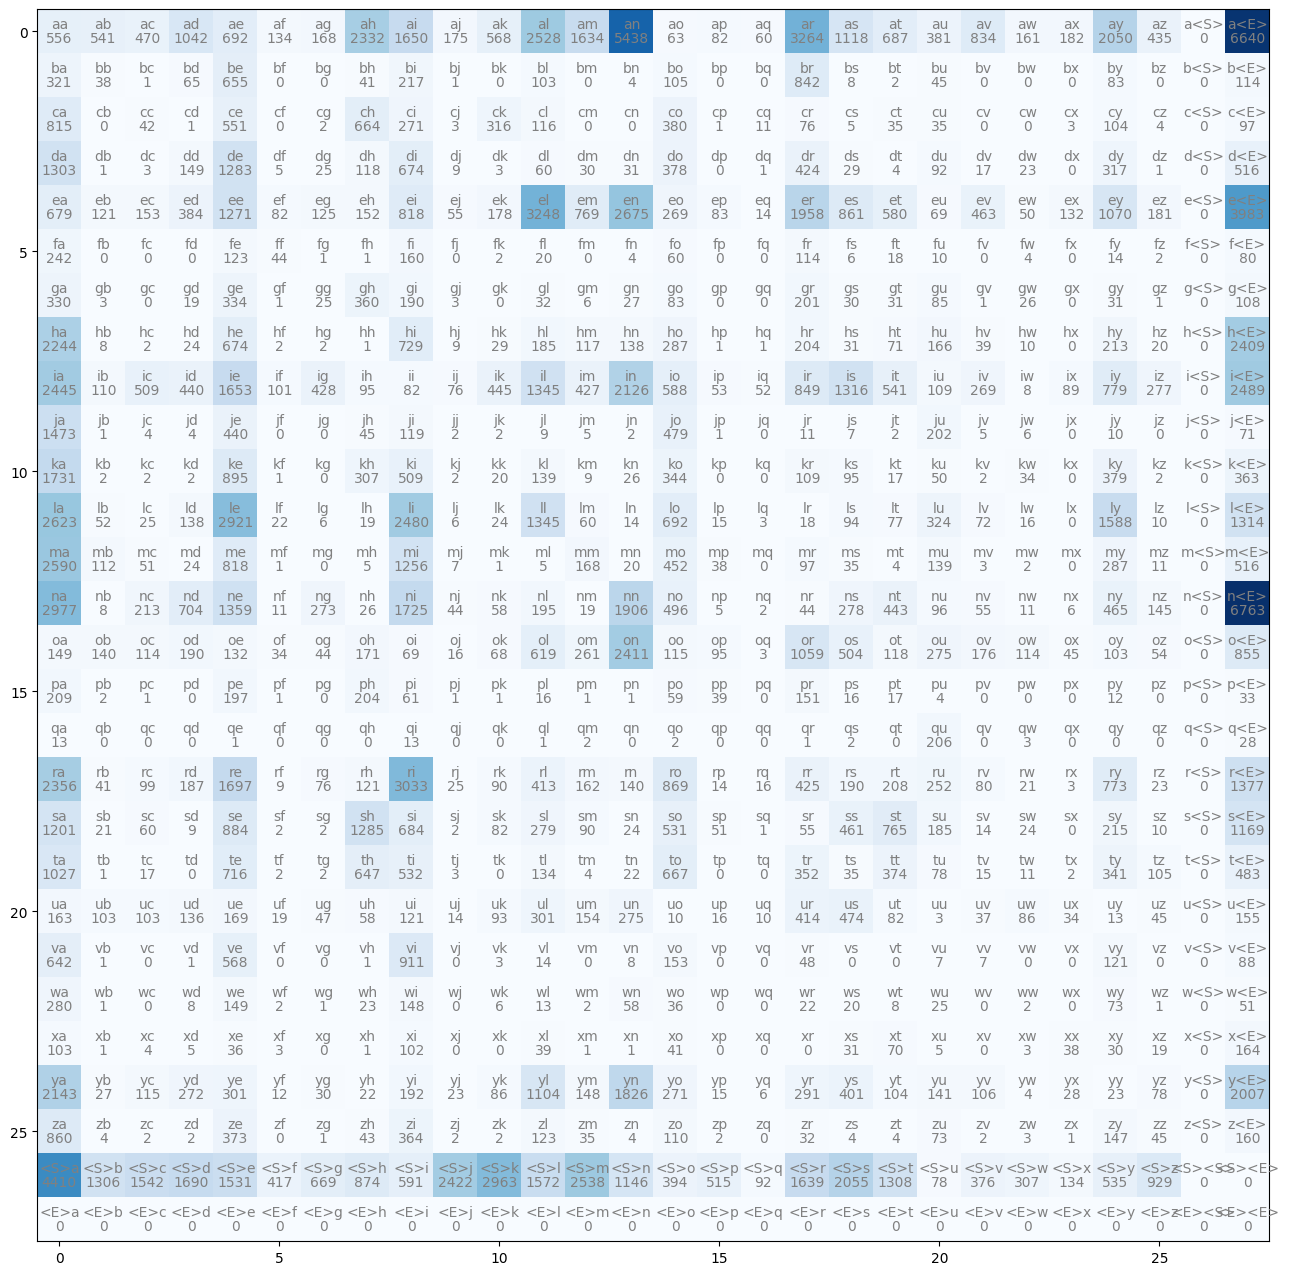

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')


Remove beginings with \<E\> and ends with \<S\>

Change from 2 special separators, to one "." 

In [13]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [14]:
chars = sorted(list(set(''.join(words))))
stoi = {s: i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i: s for s, i in stoi.items()}

In [15]:
for w in words:
    ch = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(ch, ch[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

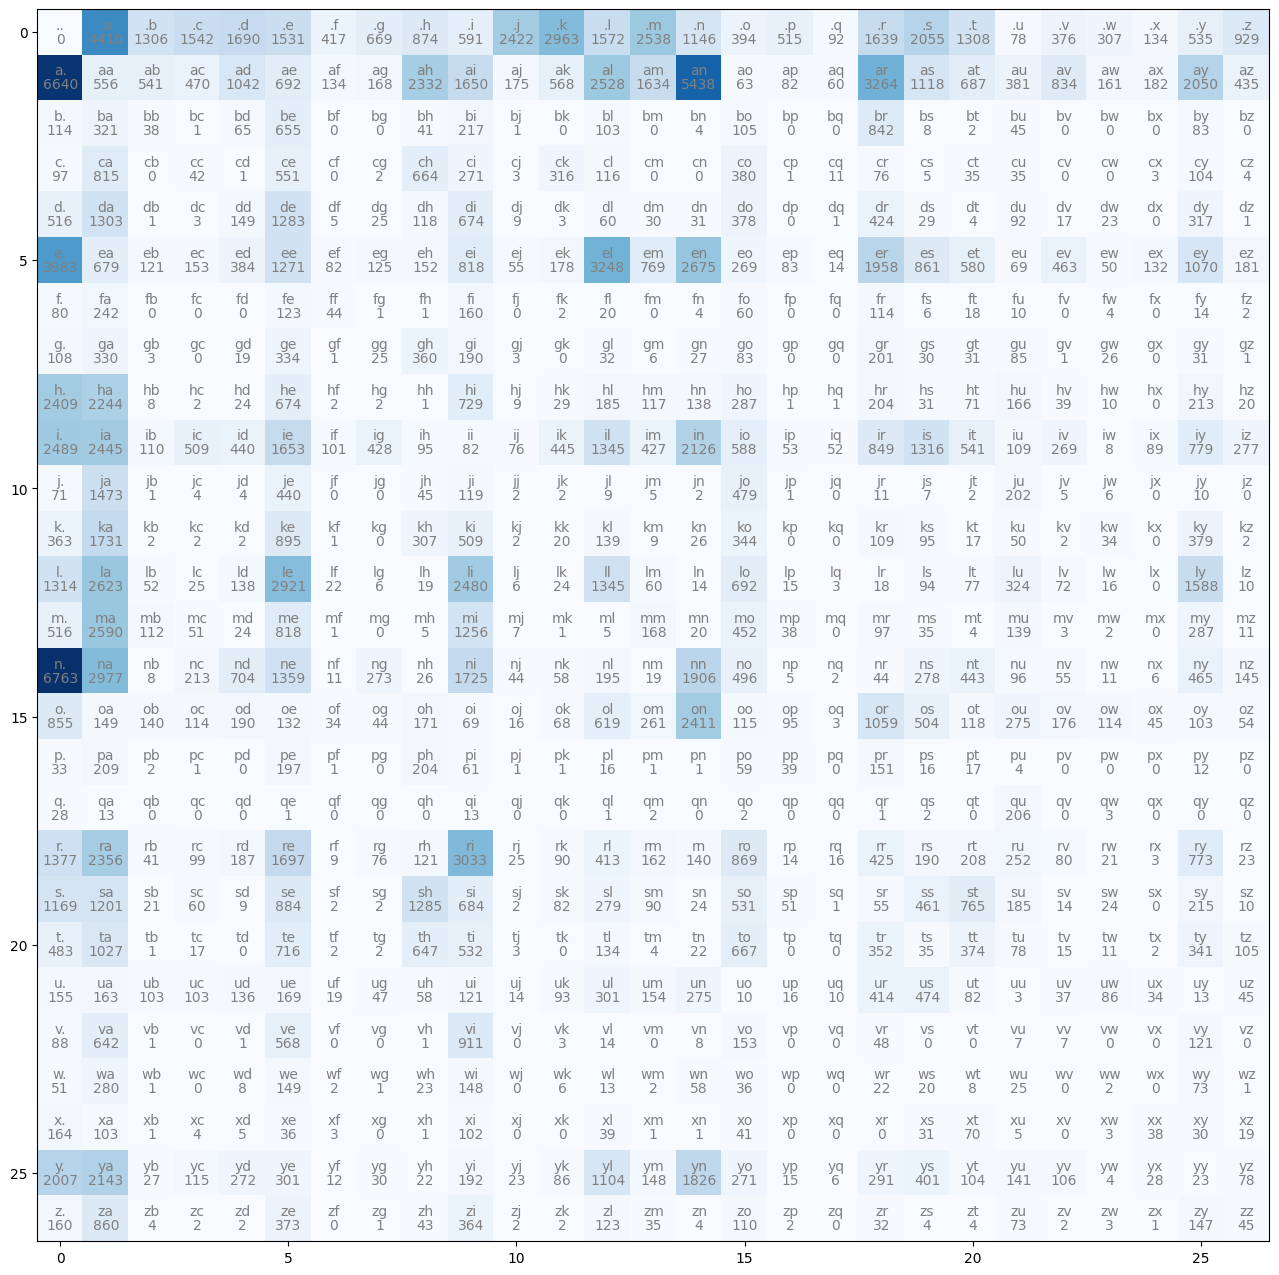

In [16]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha='center', va='bottom', color='gray')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')

In [17]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [18]:
# How to sample from a distribution
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
print(p)
p = p / p.sum()
p

tensor([0.7081, 0.3542, 0.1054])


tensor([0.6064, 0.3033, 0.0903])

In [19]:
torch.multinomial(p, num_samples=20, replacement=True, generator=g)

tensor([1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

In [20]:
# Chances of the caracters be on the begining of the name
p = N[0].float()
p = p / p.sum()
p.sum(), p

(tensor(1.),
 tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
         0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
         0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290]))

In [21]:
g = torch.Generator().manual_seed(2147483647)
ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
itos[ix]

'c'

In [22]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


In [23]:
# For efficiency, lets use broadcasting

In [24]:
N.shape

torch.Size([27, 27])

In [25]:
P = (N+1).float()

In [26]:
# Just to visualize
P_ = P.sum(1, keepdim=True)
P_.shape

torch.Size([27, 1])

In [27]:
P /= P.sum(1, keepdim=True)
P[0].sum()

tensor(1.)

In [28]:
g = torch.Generator().manual_seed(2147483647)

for i in range(10):
    out = []
    ix = 0
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.


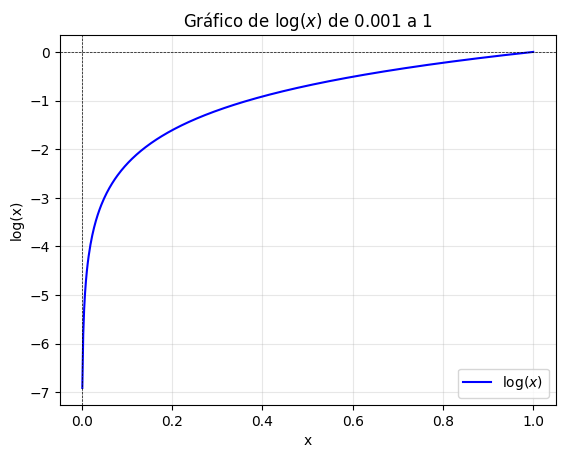

In [29]:
import numpy as np

# Cria um array de valores de x de 0.001 a 1 (não inclui 0)
x = np.linspace(0.001, 1, 500)

# Calcula o logaritmo natural de x
y = np.log(x)

# Plota o gráfico
plt.plot(x, y, label=r'$\log(x)$', color='blue')

# Personaliza o gráfico
plt.title('Gráfico de $\\log(x)$ de 0.001 a 1')
plt.xlabel('x')
plt.ylabel('log(x)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # linha do eixo x
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # linha do eixo y (não aparece no domínio)
plt.grid(True, alpha=0.3)
plt.legend()

# Mostra o gráfico
plt.show()

GOAL: Minimize likelihood of the data w.r.t. model parameters (statistical modeling)

-> equivalent to maximizing the log likelihood (because log is monotonic)

-> equivalent to minimizing the negative log likelihood

-> equivalent to minimizing the average negative log likelihood

$log(a*b*c) = log(a) + log(b) + log(c)$

In [30]:
# we need to obtain a value that tell us how good our model is

# The product of all probabilities is the likelihood
# For convenience we use log, because the product of decimal numbers would be a very small number

log_likelihood = 0.0
n = 0

for w in words[:3]:
# for w in ['mgarcelo']: # Example for unlikeli name
    ch = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(ch, ch[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1
        print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')

.e: 0.0478 -3.0410
em: 0.0377 -3.2793
mm: 0.0253 -3.6753
ma: 0.3885 -0.9454
a.: 0.1958 -1.6305
.o: 0.0123 -4.3965
ol: 0.0779 -2.5526
li: 0.1774 -1.7293
iv: 0.0152 -4.1845
vi: 0.3508 -1.0476
ia: 0.1380 -1.9807
a.: 0.1958 -1.6305
.a: 0.1376 -1.9835
av: 0.0246 -3.7041
va: 0.2473 -1.3971
a.: 0.1958 -1.6305
log_likelihood=tensor(-38.8086)


In [31]:
# the closer the probabilities are from 1, closer the number will be from 0
# the smaller the probabilities are, the number will tent to -inf

# For loss function, the lower, the better the model is, so we want to minimize the loss
nll = -log_likelihood
print(f'{nll=}')
print(f'NLL Normalized : {nll/n}') # Our loss function

nll=tensor(38.8086)
NLL Normalized : 2.4255354404449463


### Model smoothing

With there is a bigram with probability of 0, the log_likelihood will be -inf, and the loss with be inf

To fix that, we can add a number to the probabilities table "N" so that no bigram is 0, all start from a number.

Note: The bigger the number, the more equaly distributed the model is

In [32]:
# Changing 
# P = (N+1).float()

### Casting the problem of bigrams into neural network framework

In [33]:
# Create the training set of all bigrams
xs, ys = [], []

for w in words[:1]:
    ch = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(ch, ch[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [34]:
xs

tensor([ 0,  5, 13, 13,  1])

In [35]:
ys

tensor([ 5, 13, 13,  1,  0])

In [36]:
# One-hot encoding
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

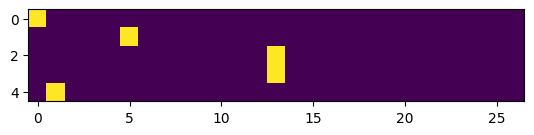

In [37]:
plt.imshow(xenc)

In [38]:
# Construct the first neuron
W = torch.randn((27, 27))
W

tensor([[ 1.2228e+00,  3.7893e-01,  1.6051e+00, -9.0924e-01, -1.8319e+00,
         -9.6015e-01,  5.5167e-01,  1.6737e+00,  1.7922e-01, -1.5424e+00,
          1.0228e+00, -6.0764e-01,  1.2081e+00, -1.1987e+00,  8.3074e-01,
          1.3425e+00, -1.1530e+00,  2.1805e-01, -7.7634e-01, -8.1733e-01,
         -1.2416e+00, -5.2088e-01, -8.2193e-01, -1.0108e+00,  1.1576e-01,
         -1.6847e+00, -3.4834e-01],
        [ 2.5197e-01, -4.2107e-01,  1.4965e+00, -3.0001e-01, -7.5518e-01,
         -5.9212e-01, -5.2277e-01, -9.2481e-01,  5.7700e-01, -7.6709e-01,
          1.0495e-01, -3.5726e-01, -5.6637e-01, -9.7846e-01, -8.4682e-01,
          8.4824e-01, -2.2940e-01,  4.0583e-01, -1.2483e+00, -1.2194e+00,
          1.0190e+00, -3.4180e-01,  4.1126e-01, -1.1607e+00,  2.3660e+00,
          1.5315e+00, -7.2737e-01],
        [-2.3161e+00, -1.4177e+00,  2.5128e-03, -6.4396e-01,  8.5845e-01,
          4.0015e-01, -1.4435e+00, -4.7267e-01, -1.0362e+00, -1.9237e-02,
          9.5844e-01, -1.5745e+00, -8.76

In [39]:
# All inputs are feed into the neuron, so they are multiplied by the weights
print((xenc @ W).shape)
xenc @ W

torch.Size([5, 27])


tensor([[ 1.2228,  0.3789,  1.6051, -0.9092, -1.8319, -0.9602,  0.5517,  1.6737,
          0.1792, -1.5424,  1.0228, -0.6076,  1.2081, -1.1987,  0.8307,  1.3425,
         -1.1530,  0.2181, -0.7763, -0.8173, -1.2416, -0.5209, -0.8219, -1.0108,
          0.1158, -1.6847, -0.3483],
        [ 1.2558, -0.9027,  0.1669, -0.2821, -1.3837,  0.8366, -0.2214, -0.3125,
         -0.7870, -2.8725,  1.2213, -1.7076,  1.5200,  0.1201, -0.1089,  0.7324,
         -0.8203,  1.0467,  0.9766,  0.5053, -0.3258,  0.4550, -0.4794, -0.4955,
         -2.2500,  0.6749,  0.1897],
        [ 0.8712,  0.7442,  1.7962,  0.2565,  0.7718, -0.8878, -0.0885, -0.0082,
          0.9466, -0.6926,  1.6557, -0.4591, -0.6955,  1.6509, -0.8662, -2.0333,
          0.0858,  0.3919, -0.1914,  0.7280,  0.2678,  0.1463,  1.7509,  0.8323,
         -0.5413, -0.7120,  0.0302],
        [ 0.8712,  0.7442,  1.7962,  0.2565,  0.7718, -0.8878, -0.0885, -0.0082,
          0.9466, -0.6926,  1.6557, -0.4591, -0.6955,  1.6509, -0.8662, -2.0333

In [40]:
# Demonstration: For example
(xenc @ W)[3, 13]

tensor(1.6509)

In [41]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [42]:
W[:, 13]

tensor([-1.1987, -0.9785, -0.0875, -1.9810,  0.9702,  0.1201,  0.5066,  0.0260,
         0.0309,  1.0267,  0.3120, -0.9129,  1.1225,  1.6509,  0.7358, -0.3587,
        -0.6364, -0.0098,  0.9163, -0.5817, -1.5954, -0.6541, -0.0177, -0.4048,
         1.1344,  0.6675, -0.2646])

In [43]:
(xenc[3] * W[:, 13])

tensor([-0.0000, -0.0000, -0.0000, -0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, -0.0000, 0.0000, 1.6509, 0.0000, -0.0000, -0.0000, -0.0000,
        0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, 0.0000, 0.0000, -0.0000])

Instead of having values from a normal distribuition, that is all arround 0.

We want that the output is some probabilities for the next character (positive numbers and sum to 1)

So the 27 output numbers must give log counts

In [44]:
(xenc @ W).exp()

tensor([[ 3.3967,  1.4607,  4.9782,  0.4028,  0.1601,  0.3828,  1.7362,  5.3316,
          1.1963,  0.2139,  2.7809,  0.5446,  3.3472,  0.3016,  2.2950,  3.8287,
          0.3157,  1.2436,  0.4601,  0.4416,  0.2889,  0.5940,  0.4396,  0.3639,
          1.1227,  0.1855,  0.7059],
        [ 3.5107,  0.4055,  1.1816,  0.7542,  0.2507,  2.3084,  0.8014,  0.7317,
          0.4552,  0.0566,  3.3914,  0.1813,  4.5721,  1.1276,  0.8968,  2.0801,
          0.4403,  2.8483,  2.6553,  1.6575,  0.7220,  1.5762,  0.6191,  0.6092,
          0.1054,  1.9639,  1.2089],
        [ 2.3898,  2.1048,  6.0264,  1.2924,  2.1636,  0.4115,  0.9153,  0.9918,
          2.5770,  0.5003,  5.2366,  0.6319,  0.4988,  5.2117,  0.4205,  0.1309,
          1.0896,  1.4797,  0.8258,  2.0709,  1.3071,  1.1575,  5.7597,  2.2987,
          0.5820,  0.4906,  1.0307],
        [ 2.3898,  2.1048,  6.0264,  1.2924,  2.1636,  0.4115,  0.9153,  0.9918,
          2.5770,  0.5003,  5.2366,  0.6319,  0.4988,  5.2117,  0.4205,  0.1309

In [45]:
logits = xenc @ W # Log-counts
counts = logits.exp() # equivalent "N"
probs = counts / counts.sum(1, keepdim=True) # Normalizing
# the last two lines together are called a 'softmax'
probs

tensor([[0.0882, 0.0379, 0.1292, 0.0105, 0.0042, 0.0099, 0.0451, 0.1384, 0.0311,
         0.0056, 0.0722, 0.0141, 0.0869, 0.0078, 0.0596, 0.0994, 0.0082, 0.0323,
         0.0119, 0.0115, 0.0075, 0.0154, 0.0114, 0.0094, 0.0291, 0.0048, 0.0183],
        [0.0946, 0.0109, 0.0318, 0.0203, 0.0068, 0.0622, 0.0216, 0.0197, 0.0123,
         0.0015, 0.0914, 0.0049, 0.1232, 0.0304, 0.0242, 0.0560, 0.0119, 0.0768,
         0.0715, 0.0447, 0.0195, 0.0425, 0.0167, 0.0164, 0.0028, 0.0529, 0.0326],
        [0.0482, 0.0424, 0.1215, 0.0261, 0.0436, 0.0083, 0.0185, 0.0200, 0.0520,
         0.0101, 0.1056, 0.0127, 0.0101, 0.1051, 0.0085, 0.0026, 0.0220, 0.0298,
         0.0167, 0.0418, 0.0264, 0.0233, 0.1161, 0.0463, 0.0117, 0.0099, 0.0208],
        [0.0482, 0.0424, 0.1215, 0.0261, 0.0436, 0.0083, 0.0185, 0.0200, 0.0520,
         0.0101, 0.1056, 0.0127, 0.0101, 0.1051, 0.0085, 0.0026, 0.0220, 0.0298,
         0.0167, 0.0418, 0.0264, 0.0233, 0.1161, 0.0463, 0.0117, 0.0099, 0.0208],
        [0.0315, 0.0161,

In [46]:
probs.shape

torch.Size([5, 27])

In [47]:
probs[0].sum()

tensor(1.0000)

In [48]:
# Now we need to calibrate the weights so that the probabilities prediction is good
# Create the training set of all bigrams
xs, ys = [], []

for w in words[:1]:
    ch = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(ch, ch[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

print(f'{xs=}')
print(f'{ys=}')

g = torch.Generator().manual_seed(2147483647)
w = torch.randn((27, 27), generator=g)

xs=tensor([ 0,  5, 13, 13,  1])
ys=tensor([ 5, 13, 13,  1,  0])


In [49]:
xenc = F.one_hot(xs, num_classes=27).float()  # Input to the network: one-hot encoding (5, 27)
logits = xenc @ W # predict log-counts
# Softmax
counts = logits.exp() # counts, equivalent to "N"
probs = counts / counts.sum(1, keepdim=True) # Normalizing, giving the probabilities for the next character

In [50]:
# for each letter on the word, stores the probabilities for all the characters being the next
probs.shape

torch.Size([5, 27])

In [51]:
# Example for .emma
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print('------')
    print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x}, {y})')
    print('input to the neural net:', x)
    print('output probabilities from the neural net:', probs[i])
    print('label (actual next charecter):', y)
    p = probs[i, y]
    print('probability assinged by the net to the correct character: ', p.item())
    logp = torch.log(p)
    print('log likelihood:', logp.item())
    nll = -logp
    print('negative log likelihood:', nll.item())
    nlls[i] = nll

print('========')
print('average negative log likelihood, i.e. loss=', nlls.mean().item())

------
bigram example 1: .e (indexes 0, 5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0882, 0.0379, 0.1292, 0.0105, 0.0042, 0.0099, 0.0451, 0.1384, 0.0311,
        0.0056, 0.0722, 0.0141, 0.0869, 0.0078, 0.0596, 0.0994, 0.0082, 0.0323,
        0.0119, 0.0115, 0.0075, 0.0154, 0.0114, 0.0094, 0.0291, 0.0048, 0.0183])
label (actual next charecter): 5
probability assinged by the net to the correct character:  0.00993888545781374
log likelihood: -4.611300468444824
negative log likelihood: 4.611300468444824
------
bigram example 2: em (indexes 5, 13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0946, 0.0109, 0.0318, 0.0203, 0.0068, 0.0622, 0.0216, 0.0197, 0.0123,
        0.0015, 0.0914, 0.0049, 0.1232, 0.0304, 0.0242, 0.0560, 0.0119, 0.0768,
        0.0715, 0.0447, 0.0195, 0.0425, 0.0167, 0.0164, 0.0028, 0.0529, 0.0326])
label (actual next charecter): 13
probability assinged by the net to the correct character:  0.03038342

---

### Optimization


Based on micrograd

In [52]:
xs, ys = [], []

for w in words[:1]:
    ch = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(ch, ch[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

print(f'{xs=}')
print(f'{ys=}')

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

xs=tensor([ 0,  5, 13, 13,  1])
ys=tensor([ 5, 13, 13,  1,  0])


#### Forward pass

In [53]:
xenc = F.one_hot(xs, num_classes=27).float()  # Input to the network: one-hot encoding (5, 27)
logits = xenc @ W # predict log-counts
# Softmax
counts = logits.exp() # counts, equivalent to "N"
probs = counts / counts.sum(1, keepdim=True) # Normalizing, giving the probabilities for the next character

In [54]:
probs[0, 5], probs[1, 13], probs[2, 13], probs[3, 1], probs[4, 0]

(tensor(0.0123, grad_fn=<SelectBackward0>),
 tensor(0.0181, grad_fn=<SelectBackward0>),
 tensor(0.0267, grad_fn=<SelectBackward0>),
 tensor(0.0737, grad_fn=<SelectBackward0>),
 tensor(0.0150, grad_fn=<SelectBackward0>))

In [55]:
torch.arange(5), ys

(tensor([0, 1, 2, 3, 4]), tensor([ 5, 13, 13,  1,  0]))

In [56]:
probs[torch.arange(5), ys]

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150], grad_fn=<IndexBackward0>)

In [57]:
loss = -probs[torch.arange(5), ys].log().mean()
loss

# Same value as obtained before

tensor(3.7693, grad_fn=<NegBackward0>)

##### Adding regularization

Is the equivalent to smoothing, with this change to minimize the loss, the weights must me all zero.

So this forces the weights to go in the direction of zero and be more uniform

The effect of this, can be control by the regularization parameter

$mean(K_r * W^2)$

In [58]:
loss = -probs[torch.arange(5), ys].log().mean() + 0.01 * (W**2).mean()
loss

tensor(3.7790, grad_fn=<AddBackward0>)

#### Backward pass

In [59]:
W.grad = None # Set to 0
loss.backward() # Same as micrograd, keeps track of all the related parameters and apply the chain rule to obtain the gradients

In [60]:
W.shape

torch.Size([27, 27])

In [61]:
W.grad.shape

torch.Size([27, 27])

In [62]:
W.grad

tensor([[ 1.2177e-02,  1.9900e-03,  2.4621e-03,  8.1170e-04,  3.3767e-03,
         -1.9754e-01,  4.9638e-04,  4.6513e-03,  2.7418e-03,  6.2794e-03,
          1.5671e-03,  5.5811e-03,  1.8136e-03,  1.6298e-03,  1.0028e-02,
          4.7643e-02,  1.2110e-02,  4.5329e-04,  5.0007e-03,  1.0693e-03,
          6.8042e-03,  2.1781e-03,  5.3587e-04,  3.9752e-03,  2.3564e-03,
          3.0806e-02,  2.9247e-02],
        [-1.9702e-01,  1.6951e-03,  7.9357e-03,  1.9736e-03,  1.2139e-02,
          6.1627e-03,  2.1722e-02,  2.6027e-03,  2.4778e-03,  9.1162e-04,
          2.0515e-02,  1.6851e-03,  1.9794e-02,  2.2044e-03,  4.6353e-03,
          4.1258e-03,  8.1722e-03,  1.5177e-03,  1.8017e-02,  1.0645e-02,
          9.2719e-03,  6.1807e-03,  9.7978e-04,  6.5749e-03,  1.3093e-02,
          1.0072e-02,  1.7948e-03],
        [ 4.0483e-06, -2.7452e-05,  1.0428e-05,  1.2984e-05, -2.4973e-05,
         -2.1483e-05,  3.7052e-06, -5.8054e-06, -2.8549e-05, -4.2160e-05,
          2.5718e-05, -2.4226e-05,  4.78

#### Update parameters

In [63]:
W.data += -0.1 * W.grad

---

### Learning loop

In [66]:
# Inicialization
xs, ys = [], []

for w in words:
    ch = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(ch, ch[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

print(f'{xs=}')
print(f'{ys=}')

# Initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146
xs=tensor([ 0,  5, 13,  ..., 25, 26, 24])
ys=tensor([ 5, 13, 13,  ..., 26, 24,  0])


In [67]:
# Gradient descent (training loop)
for k in range(100):
    # Forward pass
    xenc = F.one_hot(xs, num_classes=27).float()  # Input to the network: one-hot encoding (5, 27)
    logits = xenc @ W # predict log-counts
    # Softmax
    counts = logits.exp() # counts, equivalent to "N"
    probs = counts / counts.sum(1, keepdim=True) # Normalizing, giving the probabilities for the next character
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01 * (W**2).mean()

    print(f'Loss: {loss}')

    # Backward pass
    W.grad = None # Set to 0
    loss.backward() # Calculates the gradients with chain rule

    # Update
    W.data += -50 * W.grad

Loss: 3.7686190605163574
Loss: 3.378804922103882
Loss: 3.1610896587371826
Loss: 3.0271859169006348
Loss: 2.9344847202301025
Loss: 2.867231607437134
Loss: 2.816654920578003
Loss: 2.777147054672241
Loss: 2.7452545166015625
Loss: 2.7188305854797363
Loss: 2.6965057849884033
Loss: 2.6773722171783447
Loss: 2.6608052253723145
Loss: 2.6463513374328613
Loss: 2.633665084838867
Loss: 2.622471332550049
Loss: 2.6125471591949463
Loss: 2.6037065982818604
Loss: 2.595794439315796
Loss: 2.5886802673339844
Loss: 2.5822560787200928
Loss: 2.5764291286468506
Loss: 2.5711236000061035
Loss: 2.566272497177124
Loss: 2.5618226528167725
Loss: 2.5577261447906494
Loss: 2.5539438724517822
Loss: 2.550442695617676
Loss: 2.5471925735473633
Loss: 2.5441696643829346
Loss: 2.5413522720336914
Loss: 2.538721799850464
Loss: 2.536261796951294
Loss: 2.5339579582214355
Loss: 2.531797409057617
Loss: 2.529768228530884
Loss: 2.527860164642334
Loss: 2.5260636806488037
Loss: 2.5243704319000244
Loss: 2.522773265838623
Loss: 2.5212640

The loss achived is roughly the same as the obtained just by counting

Before we achived by couting, now from a gradient optimization aproch

This is particular for the bigram 

By the end of the training "W" is approximately "N"

---

### Sampling from the model (inference)

In [71]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

    out = []
    ix = 0
    while True:

        # Before ---------
        p = P[ix]
        # Now ------------
        # xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        # logits = xenc @ W
        # counts = logits.exp()
        # p = counts / counts.sum(1, keepdim=True)
        # ----------------

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


cexze.
momasurailezitynn.
konimittain.
llayn.
ka.


In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

    out = []
    ix = 0
    while True:

        # Before ---------
        # p = P[ix]
        # Now ------------
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # This is what can be changed on our neural network, like be Transformers
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True)
        # ----------------

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.


In [73]:
# Same result, because N = W :)